In [1]:
import pandas as pd
import sqlite3
import matplotlib as mlp
from pandas.plotting import scatter_matrix

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

### 1. Create a dataframe where each user of the test group has the average difference, number of pageviews and number of commits
### 2. Do not take project1 into account for calculations of the average difference and the number of commits
### 3. Take the number of commits from the checker table

In [3]:
query = """
SELECT
    avg.avg_diff,
    pv.pageviews,
    c.num_commits
FROM
(
    (SELECT c.uid,
        AVG((julianday(c.timestamp) - julianday(datetime(d.deadlines, 'unixepoch'))) * 24) AS avg_diff
    FROM checker c
    JOIN deadlines d ON c.labname = d.labs
    WHERE
        c.uid NOT LIKE 'admin_%'
        AND c.labname != 'project1'
        AND c.numTrials = 1
        AND c.uid IN (SELECT uid FROM test)
    GROUP BY c.uid) AS avg
JOIN
    (SELECT uid,
        COUNT(*) AS pageviews
    FROM pageviews 
    WHERE 
        uid IN (SELECT uid FROM test)
    GROUP BY uid) AS pv
ON avg.uid = pv.uid
JOIN
    (SELECT uid,
    COUNT(*) AS num_commits
    FROM checker 
    WHERE
         uid IN (SELECT uid FROM test)
         AND labname != 'project1'
    GROUP BY uid) AS c
ON avg.uid = c.uid
)   
"""

In [4]:
graph_data = pd.read_sql(query, con)
graph_data

,avg_diff,pageviews,num_commits
0,-65.119644,28,62
1,-75.242310,89,20
2,-159.568696,143,61
3,-62.207513,47,51
4,-6.367907,3,5
5,-99.440298,16,118
6,-96.111041,10,65
7,-93.474751,179,79
8,-86.793652,149,60
9,-105.738041,317,18


In [5]:
con.close()

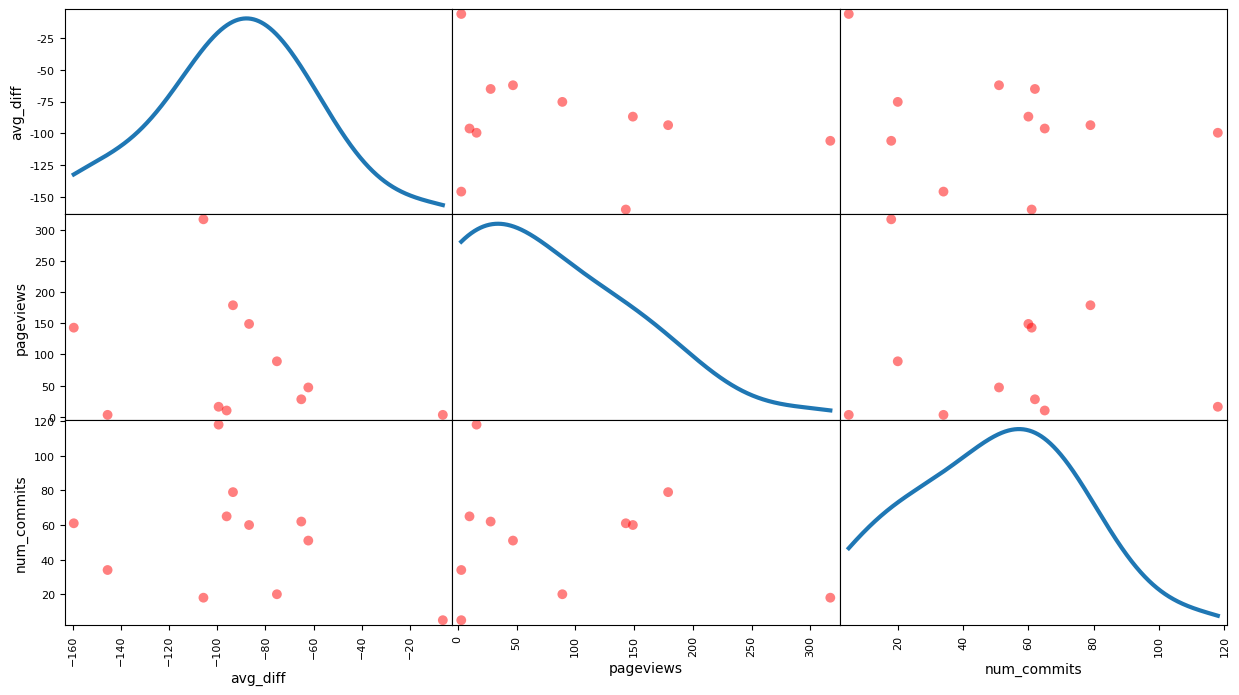

In [6]:
mlp.rcParams['lines.linewidth'] = 3

scat_matrix = scatter_matrix(frame=graph_data, 
                             figsize=(15.0, 8),
                             diagonal='kde',
                             c='red',
                             s=200)

* At the end of your Jupyter Notebook, create a markdown cell and insert the questions:
  * “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?” The answer: yes or no. 
  * “Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?” The answer: yes or no. 
  * “Can we say that there are many users with a low number of commits and a few with a high number of commits?” The answer: yes or no. 
  * “Can we say that there are many users with a small average difference and a few with a large average difference?” The answer: yes or no.

* Question:

Can we say that if a user has a low number of pageviews then they likely have a low number of commits?

* Answer:

NO
* Question:

Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?

* Answer:

NO
* Question:

Can we say that there are many users with a low number of commits and a few with a high number of commits?

* Answer:

YES
* Question:

Can we say that there are many users with a small average difference and a few with a large average difference?

* Answer:

NO